# Demo with EBT Tool and Machine Learning Model

In [1]:
# Install libraries

import os
import sys
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.lines as lines

from sklearn.preprocessing import MinMaxScaler, PowerTransformer, StandardScaler
from IPython.display import display, HTML

# Ignore warnings 
pd.options.mode.chained_assignment = None

# Set figure size
plt.rcParams['figure.figsize'] = [25, 10]

In [2]:
# Create universally (i.e. across various operating systems) recognized paths

notebook_path = os.path.abspath('EBT Demo.ipynb')                      # Jupyter notebook path
TCDF_path = os.path.join(os.path.dirname(notebook_path), 'TCDF')       # TCDF folder path
TCDFdata_path = os.path.join(TCDF_path, 'data')                        # TCDF/data folder path
EBT_path = os.path.join(os.path.dirname(notebook_path), 'EBT Data')    # EBT folder path
DefaultCod_path = os.path.join(EBT_path, 'Modified Default Cod')       # EBT/Modified Default Cod folder path
Cod_path = os.path.join(DefaultCod_path, 'Modified Default.out')       # EBT/Modified Default Cod/Modified Default.out file path

## EBT Tool

### Import EBT Tool Data with pandas
Two different datasets can be distinguished: Default Cod and Cannibalistic Cod. See paper (2008) and EBT Tutorial (2020) by Anieke van Leeuwen et al.

*Note that objects with uppercase namespaces are solely used for raw data files*

In [3]:
# Install conda- and pip packages in the current Jupyter kernel

!conda install -c anaconda tensorflow --y
!pip3 install torch torchvision torchaudio
!{sys.executable} -m pip install torchvision

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: \ ^C
failed with initial frozen solve. Retrying with flexible solve.

CondaError: KeyboardInterrupt

     |████████████████████████████████| 1.5 MB 4.2 MB/s eta 0:00:01
ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

torchaudio 0.9.0 requires torch==1.9.0, but you'll have torch 1.8.1 which is incompatible.


In [4]:
import pandas as pd

# Get path for EBT data (.txt file)
path = Cod_path

# Define column names (see EBT .c file in output variables section) for multilevel indexing
variables = ['Time', 'Years', 'RS', 'RJ', 'RA', 'SJ', 'SA', 'SB', 'CJ', 'CA', 'CB', 'Fc', 'ΔCJ with Fc', 'ΔCS with Fc',
             'ΔCA with Fc', 'ΔC with Fc', 'ΔSB', 'ΔSJ', 'ΔSA', 'ΔCB', 'ΔCJ', 'ΔCA', 'ΣC', 'Fs']
units = ['[day]', '[year]', '[g V-1]', '[g V-1]', '[g V-1]', '[g V-1]', '[g V-1]', '[g V-1]', '[g V-1]', '[g V-1]',
         '[g V-1]', '[-]', '[g V-1 year-1]', '[g V-1 year-1]', '[g V-1 year-1]', '[g V-1 year-1]', '[g V-1 year-1]',
         '[g V-1 year-1]', '[g V-1 year-1]', '[g V-1 year-1]', '[g V-1 year-1]', '[g V-1 year-1]', '[g V-1]', '[-]']

with open(path) as Default_Cod:
    default_cod = pd.read_csv(Default_Cod, delimiter = '\t', header=None)

# Set column names and index
#columns = pd.MultiIndex.set_codes([[variables, units]], names = ['Output variable', 'Unit'])
default_cod.columns = variables
#default_cod.columns = columns
default_cod = default_cod.set_index('Time')

# Check (dimensions of) array
print(default_cod.shape)           # Must be identical to ('Maximum integration time' + 1, OUTPUT_VAR_NR + 1) in EBT tool

default_cod.head()

(36501, 23)


,Years,RS,RJ,RA,SJ,SA,SB,CJ,CA,CB,...,ΔCA with Fc,ΔC with Fc,ΔSB,ΔSJ,ΔSA,ΔCB,ΔCJ,ΔCA,ΣC,Fs
Time,,,,,,,,,,,,,,,,,,,,,
0.0,0.000000,54.821297,0.268207,0.989287,8.511213,9.955314,50.033894,8.186889,0.809228,0.842293,...,0.0,0.0,56.602835,22.673092,25.988747,0.830739,0.149208,0.307874,9.838410,0.0
1.0,0.002740,54.821323,0.268207,0.989287,8.511207,9.955310,50.033881,8.186888,0.809230,0.842294,...,0.0,0.0,56.602823,22.673058,25.988736,0.830741,0.149204,0.307875,9.838412,0.0
2.0,0.005479,54.821349,0.268207,0.989287,8.511201,9.955306,50.033867,8.186887,0.809231,0.842295,...,0.0,0.0,56.602811,22.673023,25.988726,0.830742,0.149200,0.307875,9.838414,0.0
3.0,0.008219,54.821374,0.268207,0.989287,8.511194,9.955302,50.033854,8.186887,0.809233,0.842297,...,0.0,0.0,56.602799,22.672989,25.988715,0.830743,0.149195,0.307876,9.838416,0.0
4.0,0.010959,54.821401,0.268207,0.989287,8.511188,9.955297,50.033840,8.186886,0.809235,0.842298,...,0.0,0.0,56.602787,22.672955,25.988704,0.830744,0.149191,0.307876,9.838418,0.0


Text(0.5, 0, 'Time [year]')

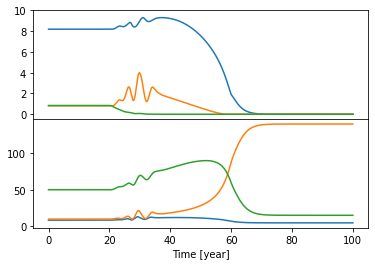

In [5]:
# Visualize default_cod as is visualized by the EBT tool
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Make figure to visualize plots in
fig, axes = plt.subplots(2, 1, sharex=True)
plt.subplots_adjust(hspace=0)

# Select the biomass columns
# Cod biomass
cod_fig = fig.add_subplot(axes[0])
cod_fig.plot(default_cod['Years'], default_cod[['CJ','CA','CB']])

cod_fig.set_xticks(np.arange(0,110,20))
cod_fig.set_yticks(np.arange(0,12,2))


# Sprat biomass
sprat_fig = fig.add_subplot(axes[1])
sprat_fig.plot(default_cod['Years'], default_cod[['SJ','SA','SB']])

cod_fig.set_xticks(np.arange(0,110,20))
cod_fig.set_yticks(np.arange(0,12,2))
sprat_fig.set_xlabel('Time [year]')

## TCDF Demo

This is a short demo for the first machine learning model, to get familiar with the training and testing of data. 

In [6]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None

# Load data from EBT tool into DataFrame
path = Cod_path
ebt = pd.read_csv(path, delimiter = '\t', header = None)

# Show first 10 rows of dataset
ebt.head(10)

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.0,0.000000,54.821297,0.268207,0.989287,8.511213,9.955314,50.033894,8.186889,0.809228,...,0.0,0.0,56.602835,22.673092,25.988747,0.830739,0.149208,0.307874,9.838410,0.0
1,1.0,0.002740,54.821323,0.268207,0.989287,8.511207,9.955310,50.033881,8.186888,0.809230,...,0.0,0.0,56.602823,22.673058,25.988736,0.830741,0.149204,0.307875,9.838412,0.0
2,2.0,0.005479,54.821349,0.268207,0.989287,8.511201,9.955306,50.033867,8.186887,0.809231,...,0.0,0.0,56.602811,22.673023,25.988726,0.830742,0.149200,0.307875,9.838414,0.0
3,3.0,0.008219,54.821374,0.268207,0.989287,8.511194,9.955302,50.033854,8.186887,0.809233,...,0.0,0.0,56.602799,22.672989,25.988715,0.830743,0.149195,0.307876,9.838416,0.0
4,4.0,0.010959,54.821401,0.268207,0.989287,8.511188,9.955297,50.033840,8.186886,0.809235,...,0.0,0.0,56.602787,22.672955,25.988704,0.830744,0.149191,0.307876,9.838418,0.0
5,5.0,0.013699,54.821427,0.268207,0.989287,8.511182,9.955293,50.033827,8.186885,0.809236,...,0.0,0.0,56.602775,22.672921,25.988692,0.830745,0.149187,0.307877,9.838420,0.0
6,6.0,0.016438,54.821453,0.268207,0.989287,8.511175,9.955289,50.033813,8.186884,0.809238,...,0.0,0.0,56.602763,22.672887,25.988681,0.830747,0.149183,0.307877,9.838422,0.0
7,7.0,0.019178,54.821479,0.268207,0.989287,8.511169,9.955284,50.033799,8.186883,0.809240,...,0.0,0.0,56.602751,22.672853,25.988669,0.830748,0.149179,0.307878,9.838424,0.0
8,8.0,0.021918,54.821506,0.268206,0.989287,8.511163,9.955279,50.033786,8.186882,0.809241,...,0.0,0.0,56.602739,22.672819,25.988657,0.830749,0.149175,0.307879,9.838426,0.0
9,9.0,0.024658,54.821533,0.268206,0.989287,8.511157,9.955275,50.033772,8.186881,0.809243,...,0.0,0.0,56.602727,22.672785,25.988645,0.830750,0.149171,0.307879,9.838428,0.0


### Data Cleaning

In [7]:
# Rename columns (see file /Users/apple/Desktop/MSc Thesis 1/MSc Thesis/Coding/Explanation Output Parameters.docx)
labels = ['Time (day)', 'Time (year)',                    # Time labels
          'Rs', 'Rj', 'Ra',                               # Shared resources biomass
          'Sj', 'Sa', 'Sb',                               # Sprat stages biomass
          'Cj', 'Ca', 'Cb',                               # Cod stages biomass
          'Fc',                                           # Fishing imposed on cod
          'ΔCj + Fc', 'ΔCa + Fc', 'ΔCb + Fc', 'ΔC + Fc',  # Changes in cod biomass when fishing present
          'ΔSb', 'ΔSj', 'ΔSa',                            # Changes in sprat biomass
          'ΔCb', 'ΔCj', 'ΔCa',                            # Changes in cod biomass
          'ΣC',                                           # Sum of cod biomass
          'Fs']                                           # Fishing imposed on sprat
ebt.columns = labels

# Show new column labels
print(ebt.columns)

Index(['Time (day)', 'Time (year)', 'Rs', 'Rj', 'Ra', 'Sj', 'Sa', 'Sb', 'Cj',
       'Ca', 'Cb', 'Fc', 'ΔCj + Fc', 'ΔCa + Fc', 'ΔCb + Fc', 'ΔC + Fc', 'ΔSb',
       'ΔSj', 'ΔSa', 'ΔCb', 'ΔCj', 'ΔCa', 'ΣC', 'Fs'],
      dtype='object')


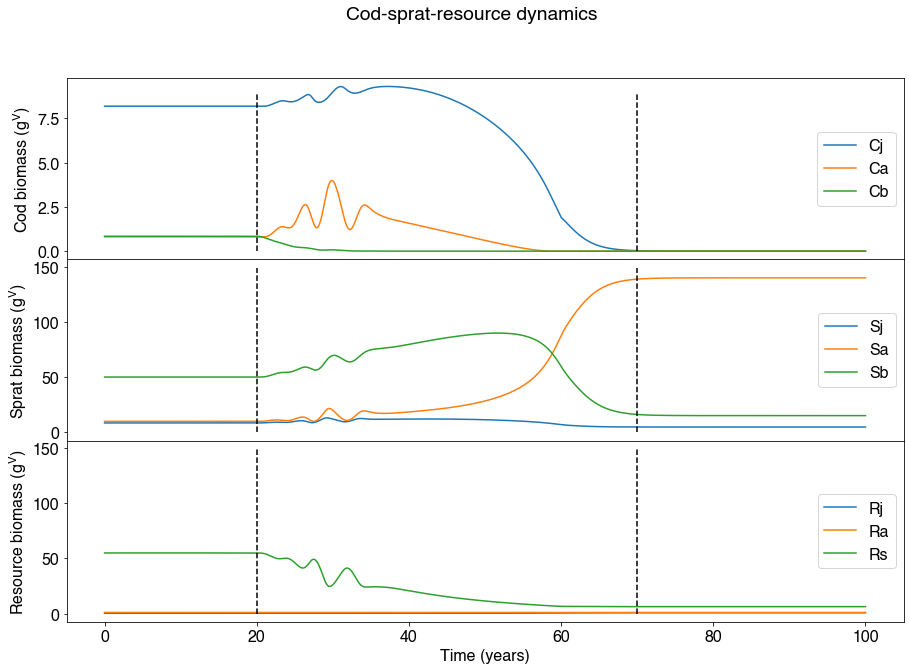

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.lines as lines

plt.rcParams["font.family"] = 'Helvetica'
plt.rcParams.update({'font.size': 16})
plt.rcParams['figure.figsize'] = [15, 10]

# Select data to be visualized
cod = ebt[['Cj', 'Ca', 'Cb']]
sprat = ebt[['Sj', 'Sa', 'Sb']]
resource = ebt[['Rj', 'Ra', 'Rs']]
time = ebt['Time (year)']

# Set subplot figure defaults
fig, [cod_plt, sprat_plt, resource_plt] = plt.subplots(3, 1, sharex = True)
fig.subplots_adjust(hspace = 0)
fig.suptitle('Cod-sprat-resource dynamics')

# Set labels for shared x-axis and individual y-axes
cod_plt.set(ylabel = 'Cod biomass ($\mathregular{g^V}$)')
sprat_plt.set(ylabel = 'Sprat biomass ($\mathregular{g^V}$)')
resource_plt.set(ylabel = 'Resource biomass ($\mathregular{g^V}$)')
plt.xlabel('Time (years)')

# Visualize data
cod_plt.plot(time, cod)
sprat_plt.plot(time, sprat)
resource_plt.plot(time, resource)

# Add legends
cod_plt.legend(['Cj', 'Ca', 'Cb'], loc = 'center right')
sprat_plt.legend(['Sj', 'Sa', 'Sb'], loc = 'center right')
resource_plt.legend(['Rj', 'Ra', 'Rs'], loc = 'center right')

# Draw vertical line at 20 years and 30 years to visualize data selection
cod_plt.plot([20] * 10, np.arange(0,10), '--k')
sprat_plt.plot([20] * 150, np.arange(0,150), '--k')
resource_plt.plot([20] * 150, np.arange(0,150), '--k')

cod_plt.plot([70] * 10, np.arange(0,10), '--k')
sprat_plt.plot([70] * 150, np.arange(0,150), '--k')
resource_plt.plot([70] * 150, np.arange(0,150), '--k')

In the above figure dashed lines represent the data I have selected to carry out a demo of the TCDF machine learning model. For the purpose of this demo I have aditionally selected a low resolution of 30 day timesteps over 100 years. Next I will clean the data for this demo purpose too, with the following characteristics:
> - Data between year 20 and 30 (i.e. 120 datapoints) 
> - Inclusion of the columns representing sprat- and cod stages
> - Inclusion of the shared resources columns

The data needs to be converted into a .csv file with every column representative of a (continuous) timeseries and the header needs explanatory column names (for eventually we will create a temporal causal graph with each node representing a timeseries).

In [12]:
# Select information of datapoints between year 20 and 30
demo_ebt = ebt[(ebt['Time (year)'] >= 20) & (ebt['Time (year)'] <= 30)]

# Select only the necessary biomass columns as timeseries
demo_ebt = demo_ebt[['Rs', 'Rj', 'Ra',
                     'Sj', 'Sa', 'Sb',
                     'Cj', 'Ca', 'Cb',
                     'Fc']]

# Reset index
demo_ebt.reset_index(inplace = True)
demo_ebt.drop('index', axis = 'columns', inplace = True)

# Show first and last five columns of clean dataframe
demo_ebt.head(-5)

,Rs,Rj,Ra,Sj,Sa,Sb,Cj,Ca,Cb,Fc
0,54.838332,0.268238,0.989280,8.510205,9.956561,50.013244,8.184919,0.809400,0.843533,0.000000
1,54.838332,0.268238,0.989280,8.510205,9.956561,50.013244,8.184919,0.809399,0.843532,0.001027
2,54.838332,0.268238,0.989280,8.510205,9.956561,50.013244,8.184919,0.809399,0.843530,0.002055
3,54.838332,0.268238,0.989280,8.510205,9.956561,50.013244,8.184918,0.809398,0.843527,0.003082
4,54.838332,0.268238,0.989280,8.510205,9.956561,50.013244,8.184917,0.809396,0.843522,0.004110
...,...,...,...,...,...,...,...,...,...,...
3641,25.940005,0.290546,0.969713,11.992235,20.165629,69.478724,8.987906,3.973822,0.076795,3.740753
3642,25.957505,0.290461,0.969712,11.986605,20.150119,69.483323,8.989210,3.972971,0.076769,3.741781
3643,25.975086,0.290377,0.969711,11.980978,20.134557,69.487854,8.990512,3.972101,0.076743,3.742808
3644,25.992747,0.290292,0.969711,11.975354,20.118942,69.492318,8.991813,3.971212,0.076716,3.743836


### Low Resolution Dataset
Run these cells when performing machine learning model with low res dataset

In [13]:
# Compress dataset to lower resolution (~365 datapoints)
low_demo_ebt = demo_ebt.iloc[::10, :]
low_demo_ebt.reset_index(drop = True, inplace = True)
low_demo_ebt['Time'] = np.linspace(20, 30, 366)

# Check format of low resolution dataset
low_demo_ebt

,Rs,Rj,Ra,Sj,Sa,Sb,Cj,Ca,Cb,Fc,Time
0,54.838332,0.268238,0.989280,8.510205,9.956561,50.013244,8.184919,0.809400,0.843533,0.000000,20.000000
1,54.838330,0.268238,0.989280,8.510207,9.956563,50.013248,8.184903,0.809379,0.843464,0.010274,20.027397
2,54.838303,0.268239,0.989280,8.510224,9.956576,50.013281,8.184851,0.809317,0.843258,0.020548,20.054795
3,54.838202,0.268241,0.989282,8.510272,9.956614,50.013370,8.184762,0.809213,0.842916,0.030822,20.082192
4,54.837966,0.268244,0.989284,8.510369,9.956694,50.013544,8.184634,0.809070,0.842440,0.041096,20.109589
...,...,...,...,...,...,...,...,...,...,...,...
361,25.440350,0.293186,0.969794,12.167928,20.617554,69.302405,8.946928,3.990450,0.077369,3.708904,29.890411
362,25.592090,0.292331,0.969755,12.111058,20.478283,69.366466,8.960258,3.987189,0.077231,3.719178,29.917808
363,25.753000,0.291479,0.969728,12.054347,20.332621,69.423668,8.973486,3.981907,0.077048,3.729452,29.945205
364,25.922587,0.290631,0.969713,11.997868,20.181086,69.474057,8.986601,3.974654,0.076820,3.739726,29.972603


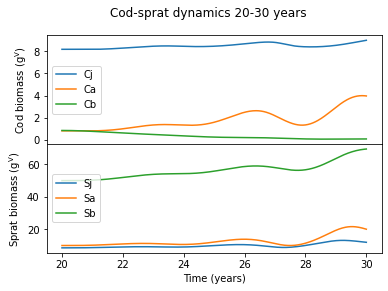

In [14]:
# Visualize data from lower resolution dataset 
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.lines as lines

# Select data to be visualized
cod = low_demo_ebt[['Cj', 'Ca', 'Cb']]
sprat = low_demo_ebt[['Sj', 'Sa', 'Sb']]
time = low_demo_ebt['Time']

# Set subplot figure defaults
fig, [cod_plt, sprat_plt] = plt.subplots(2, 1, sharex = True)
fig.subplots_adjust(hspace = 0)
fig.suptitle('Cod-sprat dynamics 20-30 years')

# Set labels for shared x-axis and individual y-axes
cod_plt.set(ylabel = 'Cod biomass ($\mathregular{g^V}$)')
sprat_plt.set(ylabel = 'Sprat biomass ($\mathregular{g^V}$)')
plt.xlabel('Time (years)')

# Visualize data
cod_plt.plot(time, cod)
sprat_plt.plot(time, sprat)

# Add legends
cod_plt.legend(['Cj', 'Ca', 'Cb'], loc = 'center left')
sprat_plt.legend(['Sj', 'Sa', 'Sb'], loc = 'center left')

# Remove Time column
low_demo_ebt.drop(['Time'], axis = 1, inplace = True)

### High Resolution Dataset
Run these cells when performing machine learning model with high res dataset

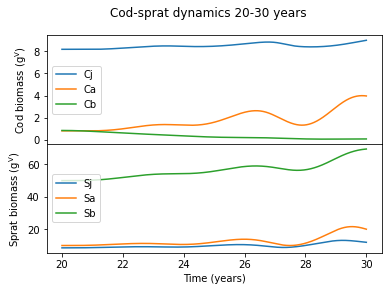

In [15]:
# Visualize data from lower resolution dataset 
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.lines as lines

# Select data to be visualized
cod = demo_ebt[['Cj', 'Ca', 'Cb']]
sprat = demo_ebt[['Sj', 'Sa', 'Sb']]
demo_ebt['Time'] = np.linspace(20, 30, 3651)
time = demo_ebt['Time']

# Set subplot figure defaults
fig, [cod_plt, sprat_plt] = plt.subplots(2, 1, sharex = True)
fig.subplots_adjust(hspace = 0)
fig.suptitle('Cod-sprat dynamics 20-30 years')

# Set labels for shared x-axis and individual y-axes
cod_plt.set(ylabel = 'Cod biomass ($\mathregular{g^V}$)')
sprat_plt.set(ylabel = 'Sprat biomass ($\mathregular{g^V}$)')
plt.xlabel('Time (years)')

# Visualize data
cod_plt.plot(time, cod)
sprat_plt.plot(time, sprat)

# Add legends
cod_plt.legend(['Cj', 'Ca', 'Cb'], loc = 'center left')
sprat_plt.legend(['Sj', 'Sa', 'Sb'], loc = 'center left')

# Remove Time column
demo_ebt.drop(['Time'], axis = 1, inplace = True)

In [16]:
from sklearn.preprocessing import MinMaxScaler

# Normalize data with min-max normalization
scaler = MinMaxScaler()
ebt_scaled = scaler.fit_transform(low_demo_ebt)

# Write scaled data to DataFrame
labels = ['Rs', 'Rj', 'Ra',
          'Sj', 'Sa', 'Sb',
          'Cj', 'Ca', 'Cb',
          'Fc']
demo_ebt_scaled = pd.DataFrame(ebt_scaled, columns = labels)

# Check the scaled DataFrame
demo_ebt_scaled.head(-10)

,Rs,Rj,Ra,Sj,Sa,Sb,Cj,Ca,Cb,Fc
0,1.000000,0.165405,0.984417,0.000000e+00,0.000123,0.000000e+00,0.011209,0.002429,1.000000,0.000000
1,1.000000,0.165409,0.984422,5.055820e-07,0.000123,2.369050e-07,0.011189,0.002423,0.999912,0.002740
2,0.999999,0.165428,0.984450,4.195656e-06,0.000124,1.907222e-06,0.011126,0.002403,0.999650,0.005479
3,0.999996,0.165470,0.984512,1.458505e-05,0.000128,6.462716e-06,0.011018,0.002371,0.999214,0.008219
4,0.999988,0.165540,0.984610,3.547577e-05,0.000135,1.537952e-05,0.010862,0.002326,0.998606,0.010959
...,...,...,...,...,...,...,...,...,...,...
351,0.000394,0.834836,0.058395,9.102274e-01,0.994137,9.365301e-01,0.771108,0.972165,0.021485,0.961644
352,0.001315,0.818991,0.050148,8.991905e-01,0.990120,9.433765e-01,0.787616,0.978138,0.021878,0.964384
353,0.002741,0.802812,0.042518,8.878420e-01,0.985123,9.498690e-01,0.804167,0.983378,0.022219,0.967123
354,0.004649,0.786351,0.035513,8.762325e-01,0.979184,9.560058e-01,0.820744,0.987887,0.022505,0.969863


In [17]:
# Define function for visualisation of scaled data 

def plot_data(ebt_scaled, years):
    # Select data to be visualized
    cod = ebt_scaled[['Cj', 'Ca', 'Cb']]
    sprat = ebt_scaled[['Sj', 'Sa', 'Sb']]
    resource = ebt_scaled[['Rj', 'Rs', 'Ra']]
    ebt_scaled['Time'] = np.linspace(years[0], years[1], len(ebt_scaled))
    time = ebt_scaled['Time']

    # Set subplot figure defaults
    fig, [cod_plt, sprat_plt, resource_plt] = plt.subplots(3, 1, sharex = True)
    fig.subplots_adjust(hspace = 0)
    fig.suptitle('Cod-sprat-resource dynamics {start}-{stop} years (scaled min-max)'.format(start=years[0],stop=years[1]))

    # Set labels for shared x-axis and individual y-axes
    cod_plt.set(ylabel = 'Cod biomass')
    sprat_plt.set(ylabel = 'Sprat biomass')
    resource_plt.set(ylabel = 'Resource biomass')
    plt.xlabel('Time (years)')

    # Visualize data
    cod_plt.plot(time, cod)
    sprat_plt.plot(time, sprat)
    resource_plt.plot(time, resource)

    # Add legends
    cod_plt.legend(['Cj', 'Ca', 'Cb'], loc = 'center left')
    sprat_plt.legend(['Sj', 'Sa', 'Sb'], loc = 'center left')
    resource_plt.legend(['Rj', 'Rs', 'Ra'], loc = 'center left')

    # Remove Time column
    ebt_scaled.drop(['Time'], axis = 1, inplace = True)

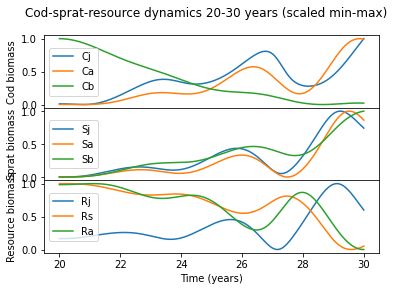

In [18]:
# Visualize scaled data 
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.lines as lines

# Plot scaled data 
plot_data(demo_ebt_scaled, [20,30])

In [19]:
# Create file path for new file
DemoEBTScaled_path = os.path.join(TCDFdata_path, 'EBT_demo_dataset.csv')

# Write clean dataframe demo_ebt to a new .csv file
demo_ebt_scaled.to_csv(DemoEBTScaled_path, index = False)

For implementation of the first machine model (i.e. TCDF) we have to create a reference to the 'groundtruth' of the model. This makes it possible to compare the found relations by the model to the true relations we have defined in the dataset.

The groundtruth file needs to be .csv file, have no heading and contains three columns. The first column consists of the index of the cause (corresponds to the columnnumber in the EBT_demo_dataset.csv file), index of effect (idem dito), and time delay between index and cause.

For the corresponding causes and effects see the paper by A. van Leeuwen et al. (2008).

In [20]:
# Create list of lists for the rows to the groundtruth.csv file
groundtruth_rows = [[9, 7, 0],  # Fc - Ca
                    [9, 8, 0],  # Fc - Cb
                    [6, 1, 0],  # Cj - Rj
                    [6, 3, 0],  # Cj - Sj
                    [7, 3, 0],  # Ca - Sj
                    [7, 4, 0],  # Ca - Sa
                    [7, 5, 0],  # Ca - Sb
                    [8, 3, 0],  # Cb - Sj
                    [8, 4, 0],  # Cb - Sa
                    [8, 5, 0],  # Cb - Sb
                    [8, 2, 0],  # Cb - Ra
                    [3, 0, 0],  # Sj - Rs
                    [4, 0, 0],  # Sa - Rs
                    [5, 0, 0]]  # Sb - Rs

# Convert list into DataFrame
groundtruth = pd.DataFrame(groundtruth_rows)

# Create file path for new file
DemoEBTGroundtruth_path = os.path.join(TCDFdata_path, 'EBT_demo_groundtruth.csv')

# Write DataFrame to .csv
groundtruth.to_csv(DemoEBTGroundtruth_path, index = False, header = False)


Performing the TCDF requires a different directory (where the TCDF is located). Check if the current directory is set at `'/.../TCDF'`.

In [21]:
# Define needed directory
directory = TCDF_path

# Check current working directory
current_directory = os.getcwd()

# Change working directory to perform TCDF
if current_directory != directory:
    os.chdir(TCDF_path)

# Check new current working directory
os.getcwd()

'C:\\Users\\10528504\\Documents\\GitHub\\thesis\\TCDF'